In [1]:
!pip install -U imbalanced-learn

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import KNNImputer

from imblearn.over_sampling import SMOTE 

In [38]:
# TRABALHO PRÁTICO 1 - Parte 3
# Alunos: Gabriel Sebe Lucchesi Barbosa; Luiz Fernando Oliveira Maciel; Priscila Goulart Carvalho; Thayris Gabriela Ferreira Rodrigues; Vinícius Ferreira Souza

col_names = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age', 'chd']
feature_cols = col_names[:9]

data = pd.read_csv("./cardiovascular.csv", header=0, names=col_names, delimiter=';', encoding='ISO-8859-1')

In [39]:
# Conversão dos valores nominais para numéricos
data = data.values

label_encoder = LabelEncoder()
data[:,4] = label_encoder.fit_transform(data[:,4]).astype('int') 
data = pd.DataFrame(data, columns=col_names)

X = data[feature_cols] # Atributos de entrada
Y = data.chd # Atributo de classificação
Y = Y.astype('int')

In [40]:
# Divisão dos dados de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1) # 80/20
train = pd.concat([X_train, y_train], axis=1, join='inner')

In [41]:
y_train = train.chd
X_train = train.drop(columns="chd")

Before oversampling:
 0    236
1    133
Name: chd, dtype: int64


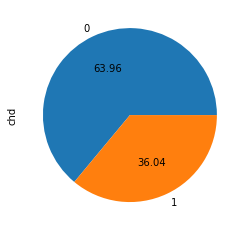

----
After oversampling:
 1    236
0    236
Name: chd, dtype: int64


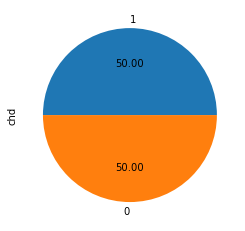

In [42]:
# Balanceamento: Usando Oversampling
print("Before oversampling:\n", y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()
print("----")

sm = SMOTE(random_state=12)
X_train,y_train = sm.fit_resample(X_train,y_train)

print("After oversampling:\n", y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.show()

In [43]:
# Treinamento: Usando Naïve Bayes
model = GaussianNB()
model = model.fit(X_train,y_train)

In [24]:
# Treinamento: Usando Decision Tree
#model = DecisionTreeClassifier()
#model = model.fit(X_train,y_train)

In [34]:
# Treinamento: Usando Random Forest
#model = RandomForestClassifier()
#model = model.fit(X_train,y_train)

In [44]:
# Teste
y_pred = model.predict(X_test)
print(y_pred)
print(y_test.values)

[0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1]
[0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0]


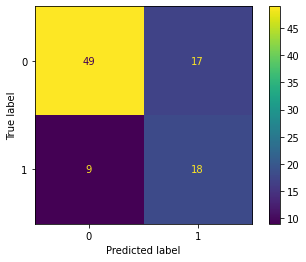

TPR: 0.7424242424242424
FNR: 0.25757575757575757
TNR: 0.3103448275862069
FPR: 0.3333333333333333
Precision: 0.8448275862068966
F1 Score: 0.7903225806451613
Accuracy: 0.7204301075268817


In [45]:
# Matriz de Confusão
matrix = confusion_matrix(y_test.values, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
disp.plot()
plt.show()

# Cálculo das métricas
TP = matrix[0][0]
TN = matrix[1][1]
FP = matrix[1][0]
FN = matrix[0][1]
accuracy = accuracy_score(y_test, y_pred)

print("TPR:", TP/(TP+FN))
print("FNR:", FN/(TP+FN))
print("TNR:", TN/(TP+FP))
print("FPR:", FP/(FP+TN))
print("Precision:", TP/(TP+FP))
print("F1 Score:", (2*TP)/(2*TP+FP+FN))
print("Accuracy:", accuracy)

In [12]:
# Mostrando a árvore
#fig = plt.figure(figsize=(50,30))
#_ = tree.plot_tree(model, feature_names=list(X_train.columns), class_names='conc', filled='true')